In [1]:

# run my startup script
exec(open("../src/functions/fun_loadStartup.py").read())
# load my functions
exec(open("../src/functions/fun_loadMyFunctions.py").read())

%config InlineBackend.figure_format='png'


loaded my modules
loaded my own functions


In [2]:
### Load grid
grdFile = '../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc'
grid = loadRomsGrid(grdFile)

loading ROMS grid from ../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc


In [3]:
### Set file names
hisFilePath='/g/data/fu5/deg581/EAC_2yr_OSSE_SSHSST/output/'

outFigurePath='../cache/out/'

In [4]:
# define function for calculating spatial mean
def indexMeanMetric(input,iRange,jRange):
    iRange=range(iRange[0],iRange[1]+1)
    jRange=range(jRange[0],jRange[1]+1)
    output = input.isel(eta_rho=iRange, xi_rho=jRange).mean(dim='eta_rho', skipna=True).mean(dim='xi_rho', skipna=True)
    return output


In [22]:
iRangeMetric = [115, 200]
jRangeMetric = [85, 150]
timeRange = [8005, 8221]
timePeriod = 4

In [23]:
import glob
chunks = {'ocean_time':1}
# filelist = glob.glob(hisFilePath+'roms_fwd_outer1_0800*.nc')
prefixForecast='roms_fwd_outer0_'
prefixAnalysis='roms_fwd_outer1_'

datelist = np.array(range(timeRange[0],timeRange[1],4))

for dates in datelist:
    filenameForecast=hisFilePath+prefixForecast+'0'+str(dates)+'.nc'
    filenameAnalysis=hisFilePath+prefixAnalysis+'0'+str(dates)+'.nc'

    sshForecast=xr.open_dataset(filenameForecast).zeta.load()
    sshAnalysis=xr.open_dataset(filenameAnalysis).zeta.load()
    sstForecast=xr.open_dataset(filenameForecast).temp.isel(s_rho=-1).load()
    sstAnalysis=xr.open_dataset(filenameAnalysis).temp.isel(s_rho=-1).load()
    # sst=xr.open_dataset(filenameForecast).temp.isel(s_rho=-1).load()

    if dates == datelist[0]:
        ssh_metricForecast = indexMeanMetric(sshForecast, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
        ssh_metricAnalysis = indexMeanMetric(sshAnalysis, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
        sst_metricForecast = indexMeanMetric(sstForecast, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
        sst_metricAnalysis = indexMeanMetric(sstAnalysis, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
    elif dates != datelist[0]:
        temp = indexMeanMetric(sshForecast, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
        ssh_metricForecast = xr.merge([ssh_metricForecast, temp])
        temp = indexMeanMetric(sshAnalysis, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
        ssh_metricAnalysis = xr.merge([ssh_metricAnalysis, temp])
        temp = indexMeanMetric(sstForecast, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
        sst_metricForecast = xr.merge([sst_metricForecast, temp])
        temp = indexMeanMetric(sstAnalysis, iRange=range(iRangeMetric[0],iRangeMetric[1]), jRange=range(jRangeMetric[0],jRangeMetric[1])).to_dataset(name = str(dates))
        sst_metricAnalysis = xr.merge([sst_metricAnalysis, temp])


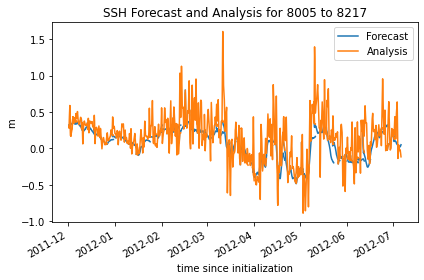

In [24]:
assimPeriod = datelist
ssh_metricForecast[str(assimPeriod[0])].plot.line("C0",label='Forecast')
ssh_metricAnalysis[str(assimPeriod[0])].plot.line("C1",label='Analysis')
for assimPeriod in datelist[1:]:
    ssh_metricForecast[str(assimPeriod)].plot.line("C0",label='')
for assimPeriod in datelist:
    ssh_metricAnalysis[str(assimPeriod)].plot.line("C1",label='')
plt.legend()
plt.title('SSH Forecast and Analysis for '+str(datelist[0])+' to '+str(datelist[-1]))
plt.ylabel('m')
plt.tight_layout()

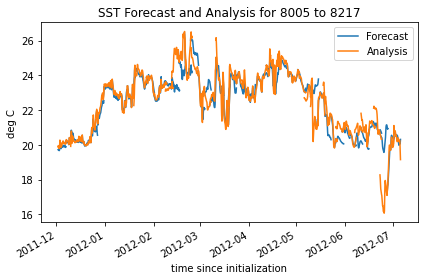

In [25]:
assimPeriod = datelist
sst_metricForecast[str(assimPeriod[0])].plot.line("C0",label='Forecast')
sst_metricAnalysis[str(assimPeriod[0])].plot.line("C1",label='Analysis')
for assimPeriod in datelist[1:]:
    sst_metricForecast[str(assimPeriod)].plot.line("C0",label='')
for assimPeriod in datelist:
    sst_metricAnalysis[str(assimPeriod)].plot.line("C1",label='')
plt.legend()
plt.title('SST Forecast and Analysis for '+str(datelist[0])+' to '+str(datelist[-1]))
plt.ylabel('deg C')
plt.tight_layout()

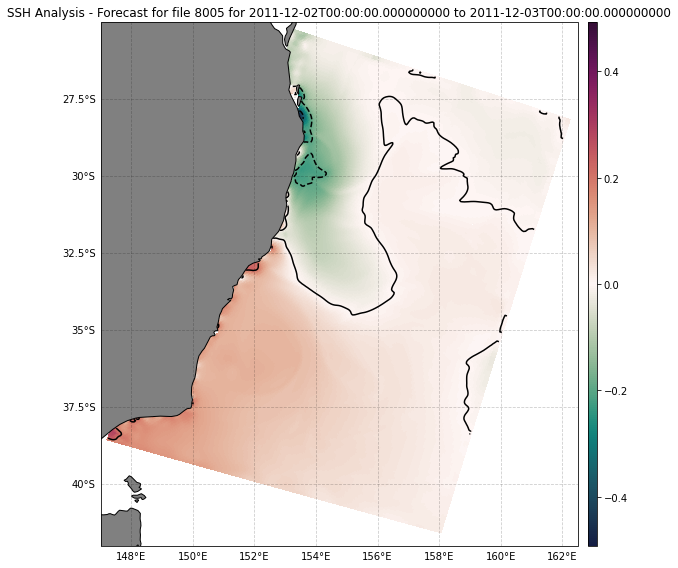

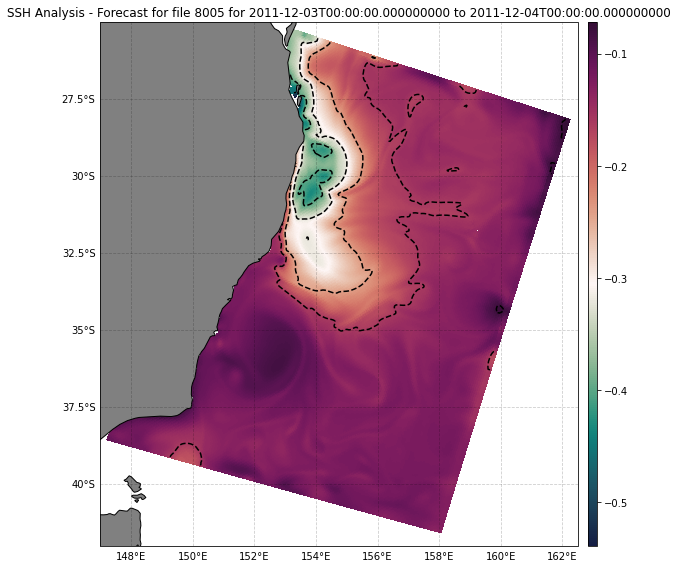

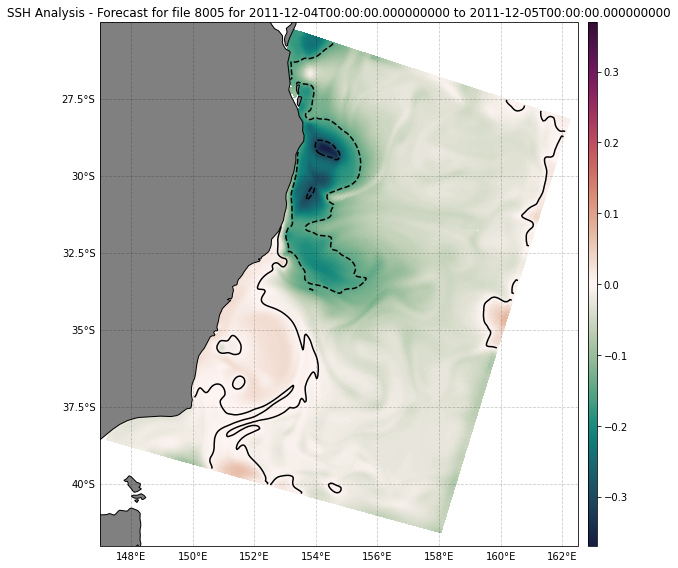

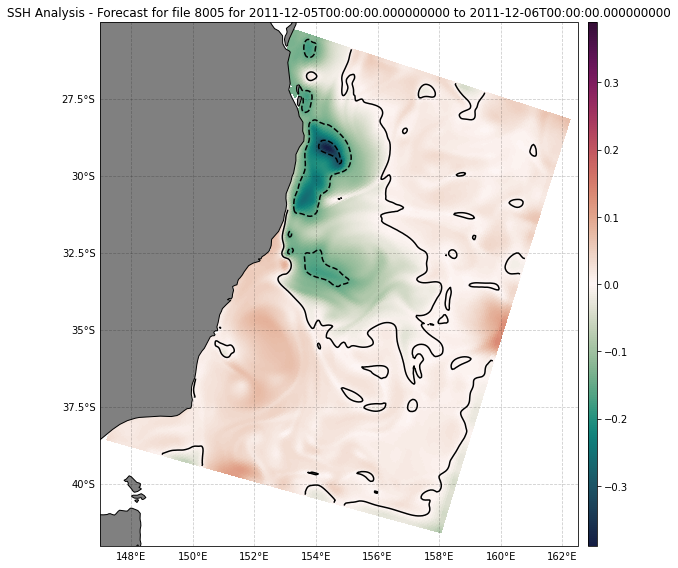

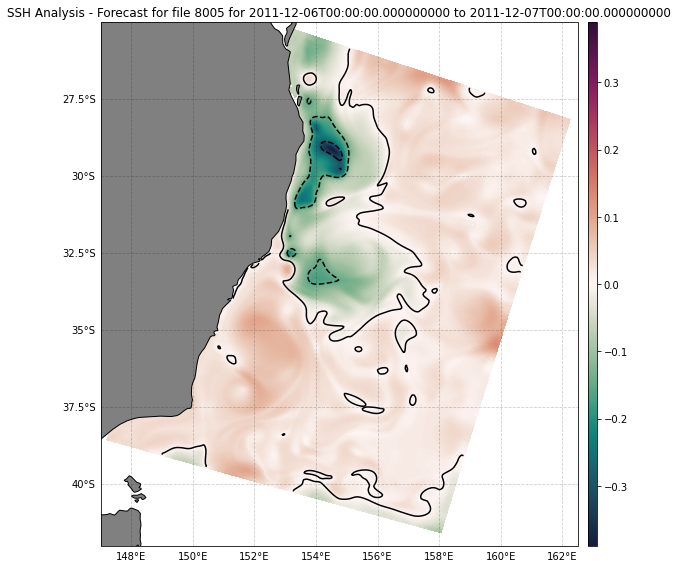

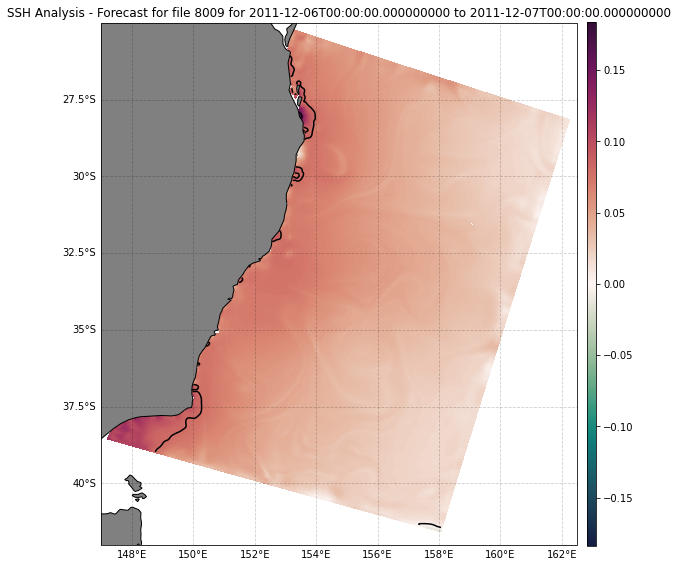

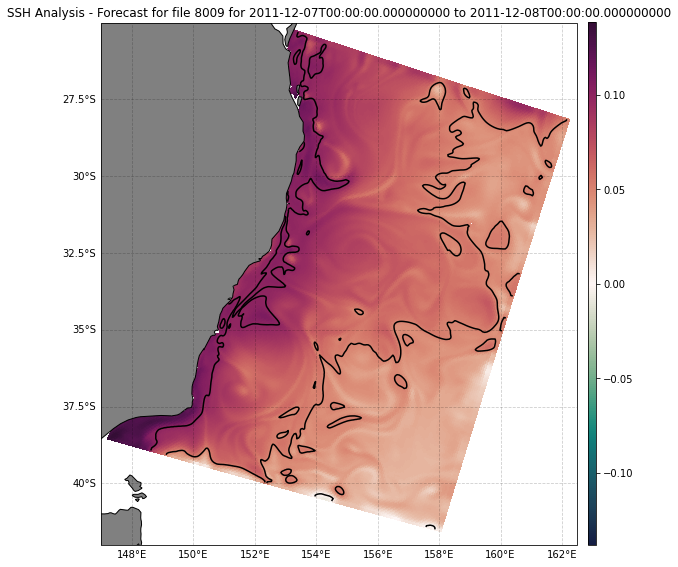

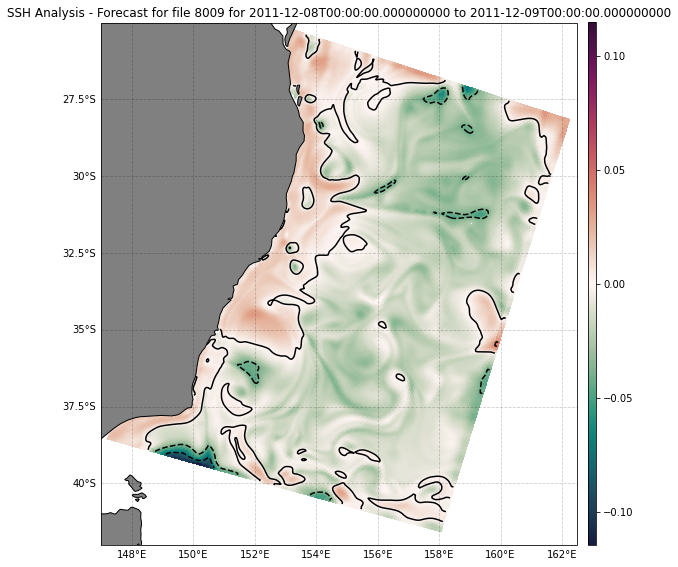

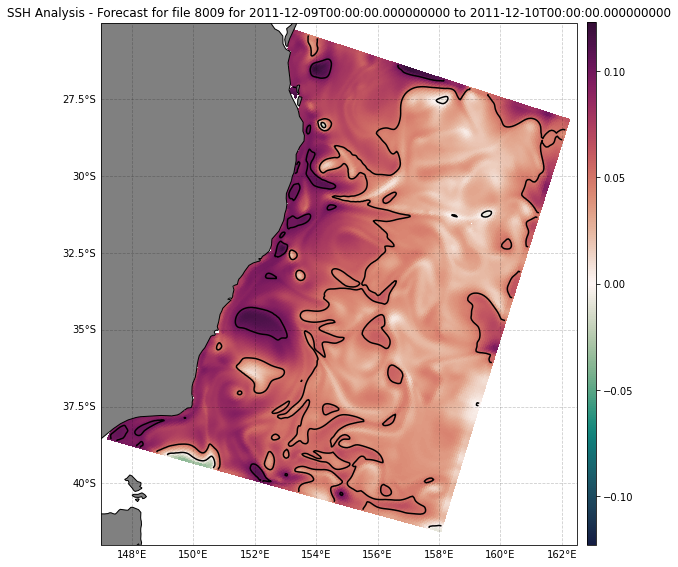

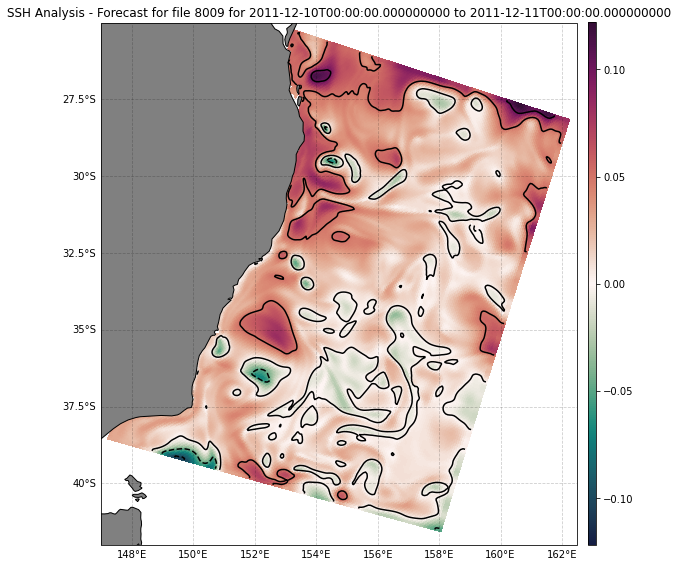

In [8]:
iRangeMetric = [115, 200]
jRangeMetric = [85, 150]
timeRange = [8005, 8013]
timePeriod = 4  #days
timeOutputs = 6 #per day
timeOutputMax = 30 #max number of outputs per file (-1)

import glob
chunks = {'ocean_time':1}
# filelist = glob.glob(hisFilePath+'roms_fwd_outer1_0800*.nc')
prefixForecast='roms_fwd_outer0_'
prefixAnalysis='roms_fwd_outer1_'

datelist = np.array(range(timeRange[0],timeRange[1],4))

for dates in datelist:
    filenameForecast=hisFilePath+prefixForecast+'0'+str(dates)+'.nc'
    filenameAnalysis=hisFilePath+prefixAnalysis+'0'+str(dates)+'.nc'

    sshForecast=xr.open_dataset(filenameForecast).zeta.load()
    sshAnalysis=xr.open_dataset(filenameAnalysis).zeta.load()
#     sstForecast=xr.open_dataset(filenameForecast).temp.isel(s_rho=-1).load()
#     sstAnalysis=xr.open_dataset(filenameAnalysis).temp.isel(s_rho=-1).load()

    for tChunk in range(0,timeOutputMax,timeOutputs):
        ## plot of mean difference over days
        toPlotData = xr.concat((sshForecast,sshAnalysis),'diff').diff(dim='diff').isel(diff=0).isel(ocean_time=np.arange(tChunk,tChunk+timeOutputs)).mean(dim='ocean_time',skipna=True)
        toPlotData

        fig = plt.figure(figsize=(8,8))
        ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
        ax.set_extent([147, 162.5, -42, -25])

        #ax.coastlines(resolution='50m')
        feature = ax.add_feature(Coast, edgecolor='black',facecolor='gray')
        im=toPlotData.plot.pcolormesh('lon_rho','lat_rho',cmap=cmocean.cm.curl, ax=ax, add_colorbar=False)
        toPlotData.plot.contour('lon_rho','lat_rho', ax=ax, colors='black')

        # cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])
        # fig.colorbar(im, cax=cbar_ax)
        plt.colorbar(im, pad=0.02, fraction=0.05, aspect=60)

        gl = ax.gridlines(draw_labels=True,
                     color='black', alpha=0.2, linestyle='--')
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER
        gl.right_labels = False
        gl.top_labels = False

        date1=np.datetime_as_string(sshForecast.coords['ocean_time'].values[tChunk])
        date2=np.datetime_as_string(sshForecast.coords['ocean_time'].values[tChunk+timeOutputs])
        plt.title('SSH Analysis - Forecast for file '+str(dates)+' for '+date1+' to '+date2)
        plt.ylabel('deg C')
        plt.tight_layout()
        figName = outFigurePath+'SSHdiff_'+str(dates)+'_day'+str(int(tChunk/timeOutputs+1))+'.png'
        plt.savefig(figName,format='png',bbox_inches='tight')